# Project 15 - Potability of water
Giulia Guglielmi & Sundaresan Karunakaran

## Imports

In [15]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [16]:
data = pd.read_csv('water_potability.csv')

## Descriptive analysis

In [17]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


From this we can infer that we have some null (NaN) values in our dataset.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: >

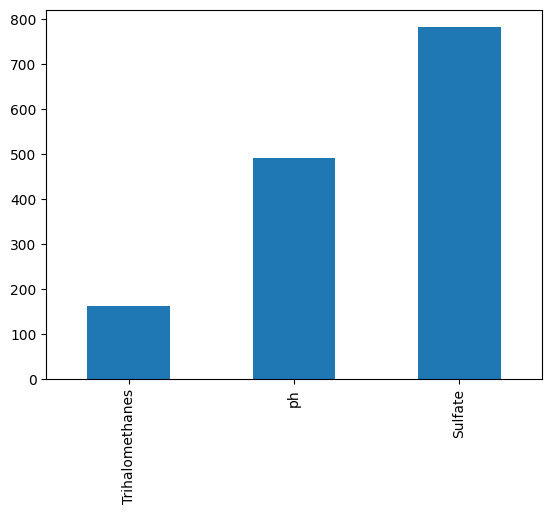

In [19]:
null_values = data.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values.plot.bar()

From this we can see that the only features that have null values are Sulfate, Ph and Trihalomethanes.

In [20]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

The featuers are all numerical attributes (float and int)

In [21]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


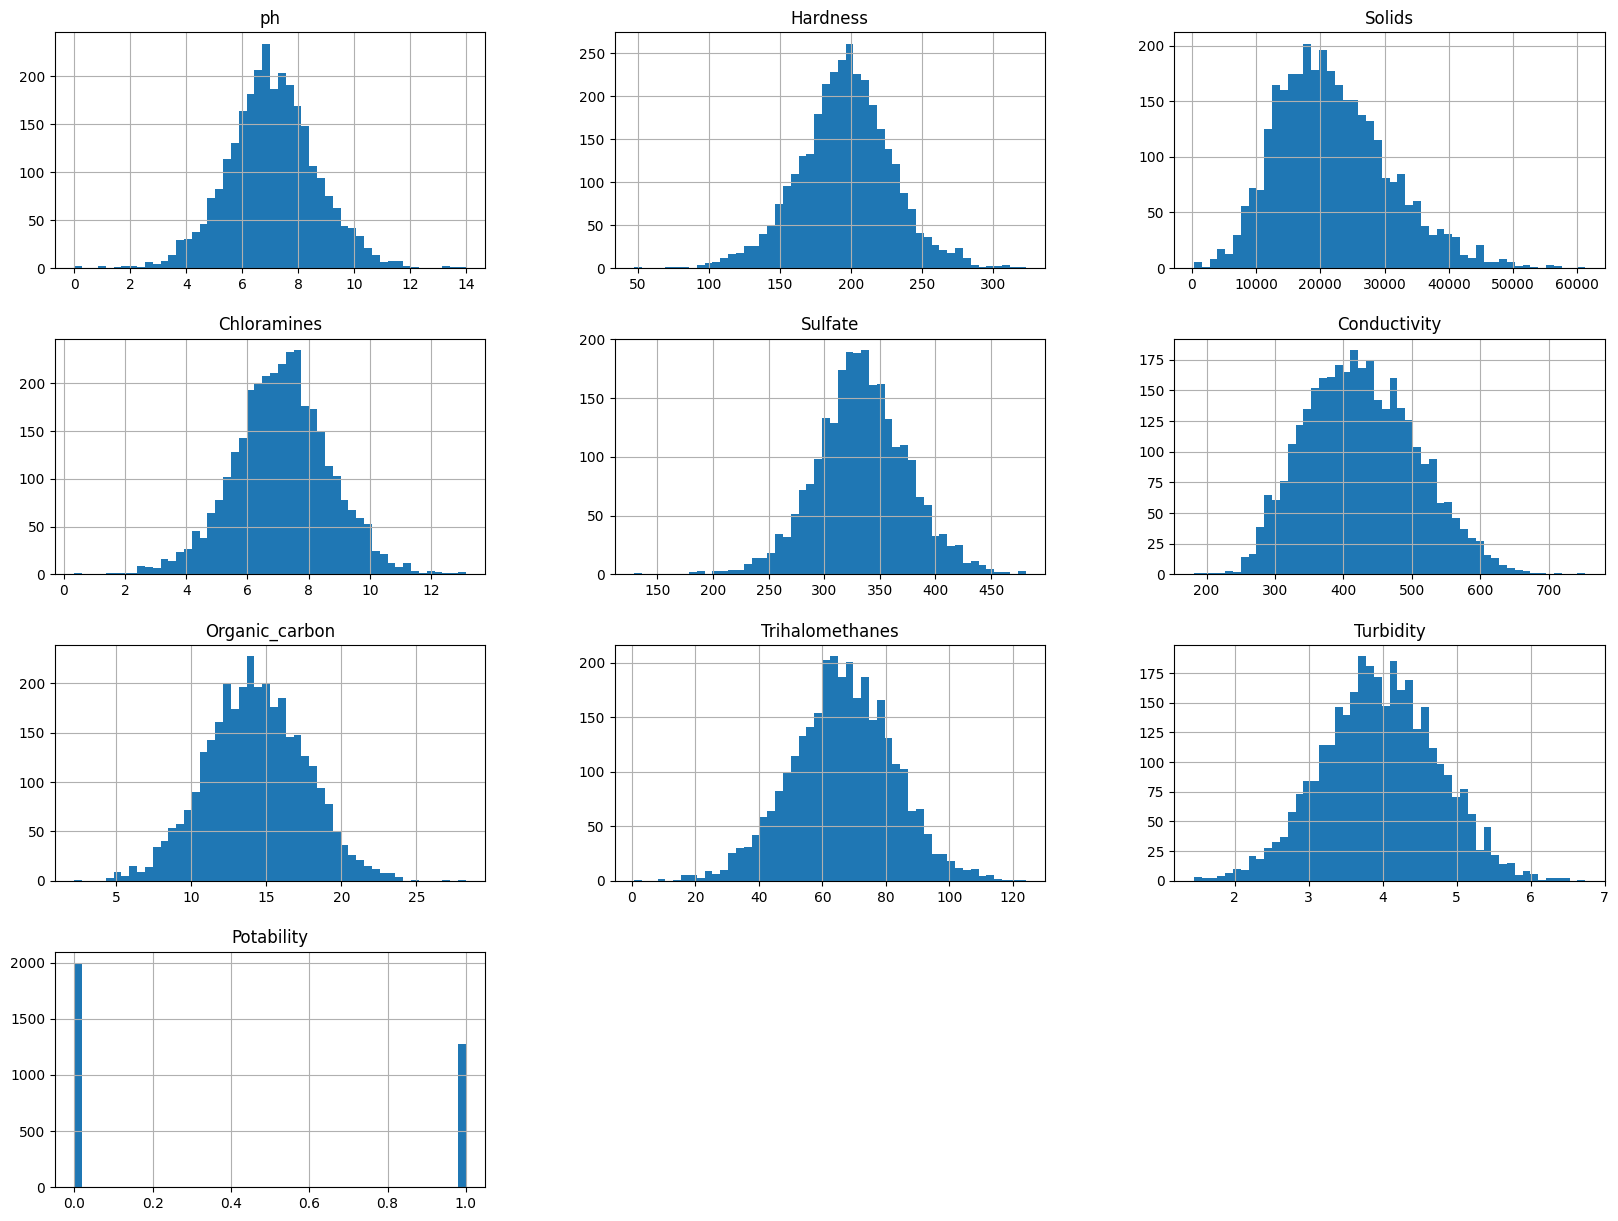

In [22]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In these graphs, we can infer that pH, Hardness, Chloramines, Sulfate, and Organic Carbon follow a normal distribution. However, the others exhibit significant skewness and kurtosis, making it difficult to establish their normal distribution.

<Axes: >

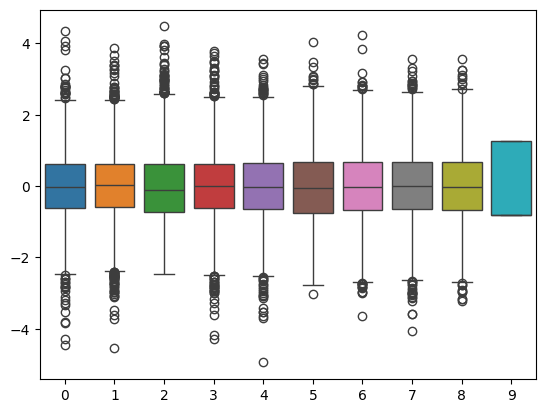

In [23]:
#Some preprocessing to scale the colums
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)
sns.boxplot(scaled_data)

The outliers in this dataset are not that great so we can safely use the dataset without removing them.

In [24]:
correlation = data.corr()
print(correlation['Potability'].sort_values(ascending=False),"\n")

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



<Axes: title={'center': 'Correlation of different features of the dataset'}>

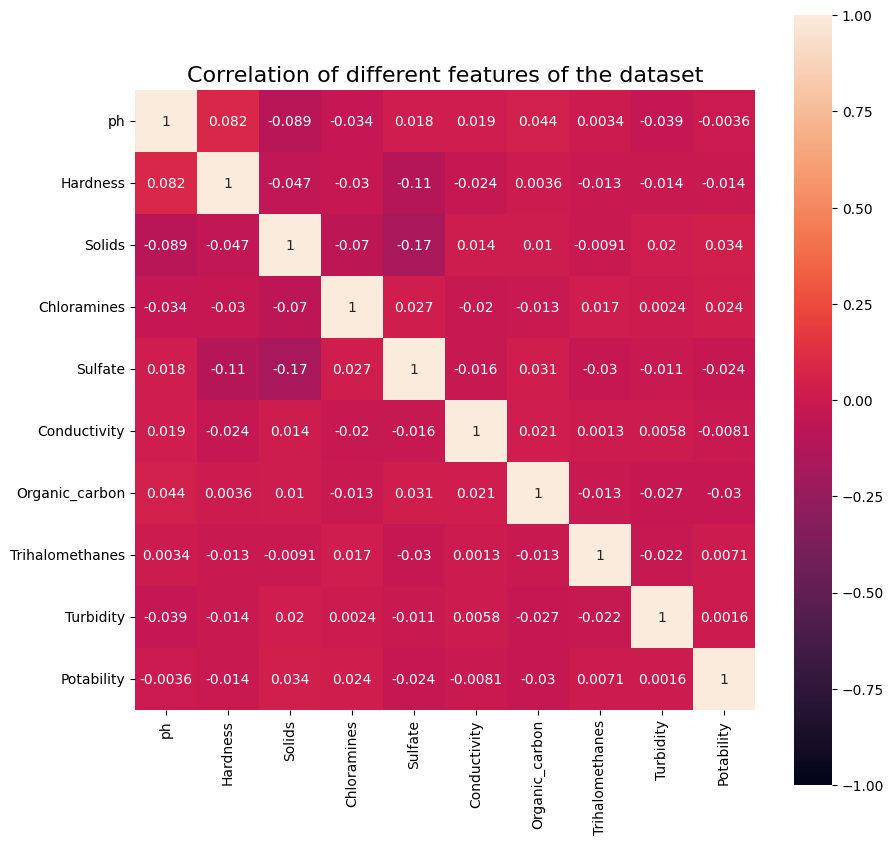

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation of different features of the dataset", y=1, size=16)
sns.heatmap(correlation, square=True,annot=True, ax=ax, vmax=1, vmin=-1)

From this we can see that even though nere is not much correlation between different columns and the end potability itself, the different columns have some postitive and negative correlation amongst themselves which on average amounts to none.

In [26]:
for x in data.columns:
    if x =="ph":
        print(x)
        df_subset = data[((data[x] < 6.5) | (data[x] > 8.5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Hardness':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >100))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Solids':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >1200))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Chloramines':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >4))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Sulfate':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >250))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Conductivity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >400))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Organic_carbon':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >2))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2)) 
    if x== 'Trihalomethanes':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >80))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))
    if x== 'Turbidity':
        print("----------------")
        print(x)
        df_subset = data[((data[x] >5))]
        print(round(((df_subset["Potability"].value_counts(normalize=True))*100),2))

ph
Potability
0    64.45
1    35.55
Name: proportion, dtype: float64
----------------
Hardness
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Solids
Potability
0    61.01
1    38.99
Name: proportion, dtype: float64
----------------
Chloramines
Potability
0    61.03
1    38.97
Name: proportion, dtype: float64
----------------
Sulfate
Potability
0    61.22
1    38.78
Name: proportion, dtype: float64
----------------
Conductivity
Potability
0    61.16
1    38.84
Name: proportion, dtype: float64
----------------
Organic_carbon
Potability
0    60.99
1    39.01
Name: proportion, dtype: float64
----------------
Trihalomethanes
Potability
0    60.47
1    39.53
Name: proportion, dtype: float64
----------------
Turbidity
Potability
0    62.74
1    37.26
Name: proportion, dtype: float64


After analyzing the data from a statistical perspective, we intend to carefully examine whether they respect the prescribed standards:
* $6.5 < $ ph $ < 8.5$
* Hardness $< 100$ mg/L
* Solids $< 1000$ mg/L
* Chloramines $< 4$ mg/L
* Sulfate $< 250$ mg/L
* Conductivity $< 400$ μS/cm
* Organic_carbon $<2$ mg/L
* Trihalomethanes $< 80$ ppm
* Turbidity $< 5.00$ NTU


Through this script, we tried to verify whether water classified as potable actually met the strict standards set by the WHO. However, the results obtained did not meet expectations. In each category, 40% of the water considered potable was actually non-potable. These cases all represent false positives.

As per the discussion we had with the TAs and the professor, we assumed that this dataset is correct and proceeded with it without any modification.

## Link Analysis

In [27]:
data = data.dropna(subset=['ph'])

Nodes:  2785
Edges:  704574


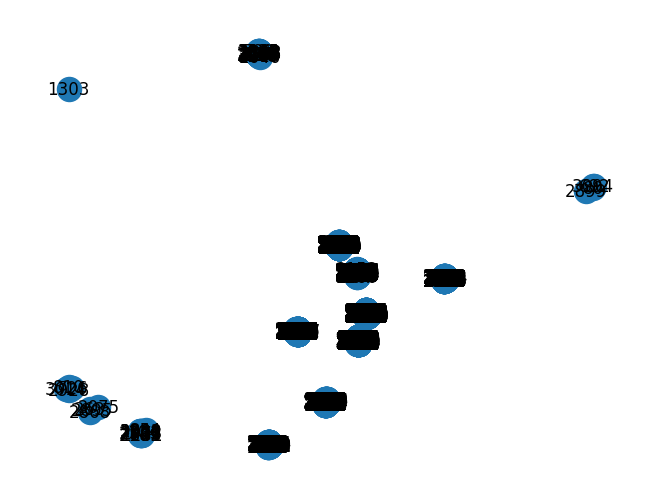

In [28]:
import pandas as pd
import networkx as nx
from scipy.spatial import distance

# Initialize the graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(data.index.tolist())
nx.set_node_attributes(G, data.to_dict('index'))

# Add edges between nodes with the same "ph" value
for i, row in data.iterrows():
    for j, other_row in data.iterrows():
        for x in range(0,14):
            if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                G.add_edge(i, j)

# Draw the graph
nx.draw(G, with_labels=True)
print("Nodes: ", G.number_of_nodes())
print("Edges: ", G.number_of_edges())

### Subgraphs

Nodes:  4
Edges:  6
Nodes:  4
Edges:  6


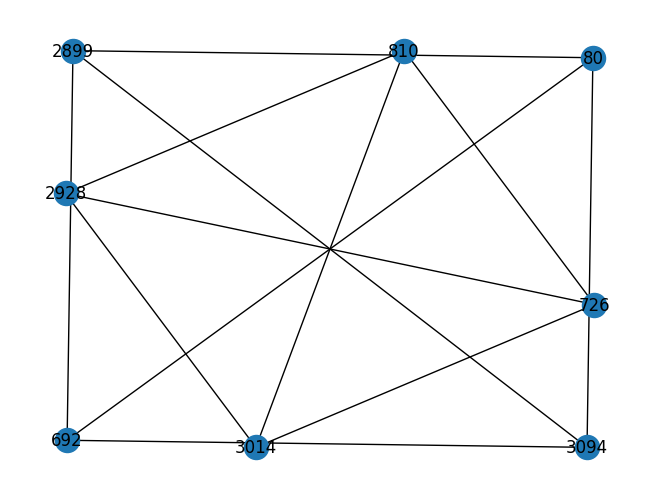

In [29]:


for x in range(0,2):
    #Remove nodes
    PH = nx.Graph()
    # Add nodes to the graph
    PH.add_nodes_from(data.index.tolist())
    nx.set_node_attributes(PH, data.to_dict('index'))
    for node in list(PH.nodes()):
        if 'ph' in PH.nodes[node] and (PH.nodes[node]['ph'] < x or PH.nodes[node]['ph'] >= x+1):
            PH.remove_node(node)

    # Add edges between nodes with the same "ph" value
    for i, row in data.iterrows():
        for j, other_row in data.iterrows():
            if ((i>j) and (row['ph']>=x and row['ph']<x+1) and (other_row['ph']>=x and other_row['ph']<x+1)):
                    PH.add_edge(i, j)
    
    nx.draw(PH, with_labels=True)
    print("Nodes: ", PH.number_of_nodes())
    print("Edges: ", PH.number_of_edges())

## Predictive modelling

### Data preprocessing

In [30]:
# Removing all rows with null value
data = data.dropna(axis=0,how='any').reset_index(drop=True)

# Splitting the dataset
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split

#Feature and target

features = list(data.columns)
features.pop()

X = data.loc[:, features]
Y = data.loc[:, ['Potability']]

print(Y)

# Splitting the data 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .80)

2024-04-16 17:41:49.884309: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 17:41:51.145310: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 17:41:54.132519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 17:41:57.355507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


      Potability
0              0
1              0
2              0
3              0
4              0
...          ...
2006           1
2007           1
2008           1
2009           1
2010           1

[2011 rows x 1 columns]


In [31]:
# Feature scaling
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
temp = scaler.fit_transform(X_train)
data2 = pd.DataFrame(temp, columns=X_train.columns)
X_train = data2

scaler2 = StandardScaler()
temp2 = scaler.fit_transform(X_test)
data21 = pd.DataFrame(temp2, columns=X_test.columns)
X_test = data21


### Logistic Regression

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6352357320099256


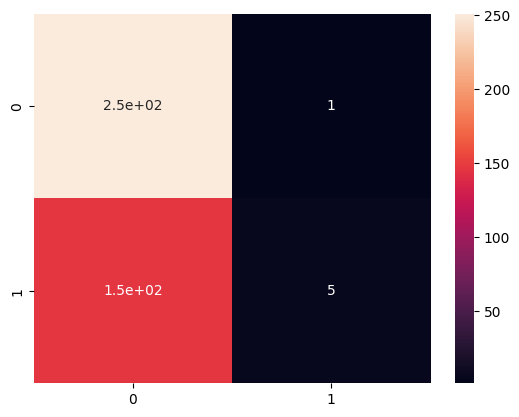

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


This is not working. The model is just saying everything is false/negative. That's why the number of values in the 0th index is significantly large when compared to the number of values in the 1st index

### SVN

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7196029776674938


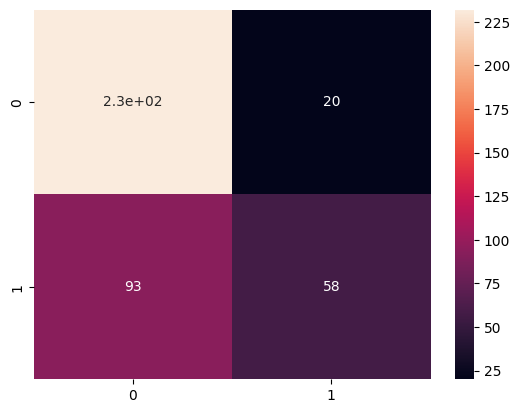

In [33]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cnf_matrix, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


### Decision Tree

In [34]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6178660049627791


### Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.707196029776675


### Sequential ANN

Epoch 1/500


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 713ms/step - acc: 0.5143 - loss: 0.7106
Epoch 2/500
1/1 - 0s - 23ms/step - acc: 0.5155 - loss: 0.7099
Epoch 3/500
1/1 - 0s - 17ms/step - acc: 0.5143 - loss: 0.7091
Epoch 4/500
1/1 - 0s - 17ms/step - acc: 0.5143 - loss: 0.7084
Epoch 5/500
1/1 - 0s - 19ms/step - acc: 0.5143 - loss: 0.7077
Epoch 6/500
1/1 - 0s - 17ms/step - acc: 0.5149 - loss: 0.7070
Epoch 7/500
1/1 - 0s - 18ms/step - acc: 0.5149 - loss: 0.7063
Epoch 8/500
1/1 - 0s - 17ms/step - acc: 0.5124 - loss: 0.7057
Epoch 9/500
1/1 - 0s - 16ms/step - acc: 0.5149 - loss: 0.7050
Epoch 10/500
1/1 - 0s - 24ms/step - acc: 0.5149 - loss: 0.7044
Epoch 11/500
1/1 - 0s - 49ms/step - acc: 0.5137 - loss: 0.7038
Epoch 12/500
1/1 - 0s - 18ms/step - acc: 0.5149 - loss: 0.7032
Epoch 13/500
1/1 - 0s - 16ms/step - acc: 0.5162 - loss: 0.7026
Epoch 14/500
1/1 - 0s - 19ms/step - acc: 0.5174 - loss: 0.7020
Epoch 15/500
1/1 - 0s - 16ms/step - acc: 0.5187 - loss: 0.7014
Epoch 16/500
1/1 - 0s - 16ms/step - acc: 0.5199 - loss: 0.7008
Epoch 17/500

<Axes: >

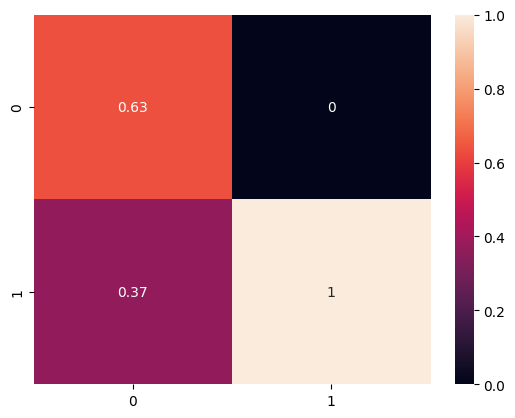

In [36]:
# Hyperparameter values

hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

# We arae using a Sequntioal model with three layers

model = Sequential()
model.add(Dense(hidden_units, input_dim=9, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])


model.fit(X_train, y_train, epochs=500, batch_size=len(data),  verbose=2)
predections = model.predict(X_test)
rounded = [int(round(x[0])) for x in predections]
result = confusion_matrix(y_test, rounded , normalize='pred')
df_cm = pd.DataFrame(result, [0,1], [0,1])
sns.heatmap(df_cm, annot=True) 